# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/bank_loan_prediction/'
%pwd

/content/drive/MyDrive/github/eda_examples/bank_loan_prediction


'/content/drive/MyDrive/github/eda_examples/bank_loan_prediction'

# Problem Statement - Bank Loan Prediction

[Kaggle compition](https://www.kaggle.com/krantiswalke/bank-personal-loan-modelling-supervised-learning)

This case is about a bank (Thera Bank)whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1 Load the libraries:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
import os,sys
# calculate accuracy measures and confusion matrix
from sklearn import metrics

sns.set(color_codes=True)
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset(Bank_Personal_Loan_Modelling.csv):

In [5]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Check the Dimension of data?

In [6]:
df.shape

(5000, 14)

**There are 5000 Observations / Rows and 14 Attributes / Columns.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Check the Information about the data and the datatypes of each respective attributes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Explain all the variables/columns and their nature.

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### Information on the features or attributes

The attributes can be divided accordingly :
* The variable **ID** does not add any interesting information. There is no association between a person's customer ID  and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Dropping insignificant columns.

In [8]:
df = df.drop(['ID', 'ZIP Code'], axis = 1) #dropping Id and Zip code columns.

In [9]:
# No columns have null data in the file
df.apply(lambda x : sum(x.isnull()))

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#00b3e5;">EDA Descriptive Statistics

In [10]:
df_desc = df[['Age', 'Experience', 'Income', 'CCAvg', 'Family']] #selecting columns for descriptive analysis 

### Mean

In [11]:
print("Data:",df_desc.mean()) 

Data: Age           45.338400
Experience    20.104600
Income        73.774200
CCAvg          1.937938
Family         2.396400
dtype: float64


### Mode

In [12]:
print("Data:",df_desc.mode()) 

Data:    Age  Experience  Income  CCAvg  Family
0   35          32      44    0.3       1


### Median

In [13]:
print("Data:",df_desc.median())

Data: Age           45.0
Experience    20.0
Income        64.0
CCAvg          1.5
Family         2.0
dtype: float64


### Quantile 25%

In [14]:
print("Data_quantile(25%):",df_desc.quantile(q=0.25))  # Prints the value below which 25% of the data lies

Data_quantile(25%): Age           35.0
Experience    10.0
Income        39.0
CCAvg          0.7
Family         1.0
Name: 0.25, dtype: float64


### Quantile 50%

In [15]:
print("Data_quantile(50%):",df_desc.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%): Age           45.0
Experience    20.0
Income        64.0
CCAvg          1.5
Family         2.0
Name: 0.5, dtype: float64


### Quantile 75%

In [16]:
print("Data_quantile(75%):",df_desc.quantile(q=0.75))   # Prints the value below which 75% of the data lies

Data_quantile(75%): Age           55.0
Experience    30.0
Income        98.0
CCAvg          2.5
Family         3.0
Name: 0.75, dtype: float64


g.Ploting histogram to check that if data columns are normal or almost normal or not

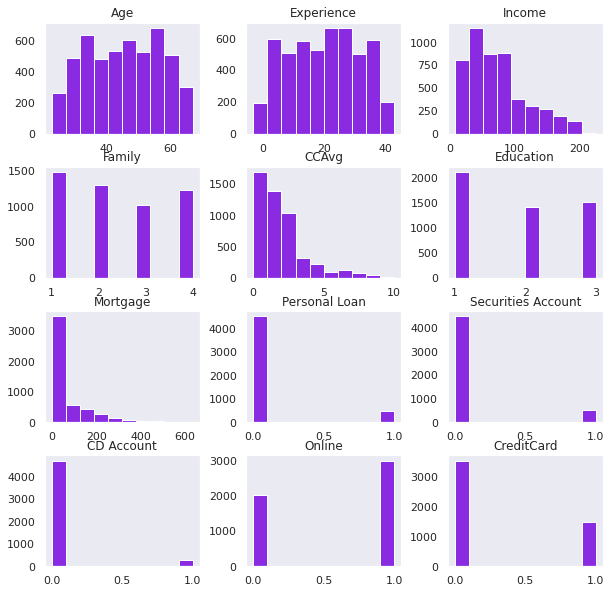

In [60]:
df.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.5a) Plotting the summery mean,mode,median of income using histogram

Mean:  73.7742 
Median:  64.0 
Mode:  44


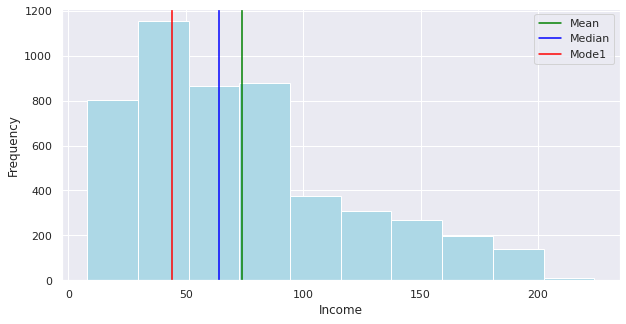

In [17]:
mean=df_desc['Income'].mean()
median=df_desc['Income'].median()
mode=df_desc['Income'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(df_desc['Income'],bins=10,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('Income')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.6 Check the data.describe()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.7 Check the Measures of Dispersion:

### IQR

In [19]:
df_desc.quantile(0.75) - df_desc.quantile(0.25)

Age           20.0
Experience    20.0
Income        59.0
CCAvg          1.8
Family         2.0
dtype: float64

### Range

In [20]:
df_desc.max() - df_desc.min()

Age            44.0
Experience     46.0
Income        216.0
CCAvg          10.0
Family          3.0
dtype: float64

### Variance

In [21]:
df_desc.var()

Age            131.404166
Experience     131.513962
Income        2119.104235
CCAvg            3.054312
Family           1.317130
dtype: float64

### Standard Deviation

In [22]:
df_desc.std()

Age           11.463166
Experience    11.467954
Income        46.033729
CCAvg          1.747659
Family         1.147663
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.8 Check Covariance and Correlation

### Covariance

In [23]:
df.cov()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,131.404166,130.698543,-29.164822,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,130.698543,131.513962,-24.587099,-0.691802,-1.003637,0.126673,-12.342843,-0.025047,-0.004321,0.028288,0.078190,0.046857
Income,-29.164822,-24.587099,2119.104235,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
Family,-0.610664,-0.691802,-8.320957,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-1.041997,-1.003637,51.970200,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,0.397949,0.126673,-7.250120,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-14.619518,-12.342843,968.321693,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-0.026092,-0.025047,6.814640,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376
Securities Account,-0.001529,-0.004321,-0.036834,0.007017,0.008063,-0.002777,-0.168308,0.001978,0.093519,0.023099,0.001894,-0.002094
CD Account,0.021965,0.028288,1.861611,0.003858,0.056850,0.002788,2.164305,0.022206,0.023099,0.056763,0.020557,0.030248


### Correlation

In [24]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


### Pairplot

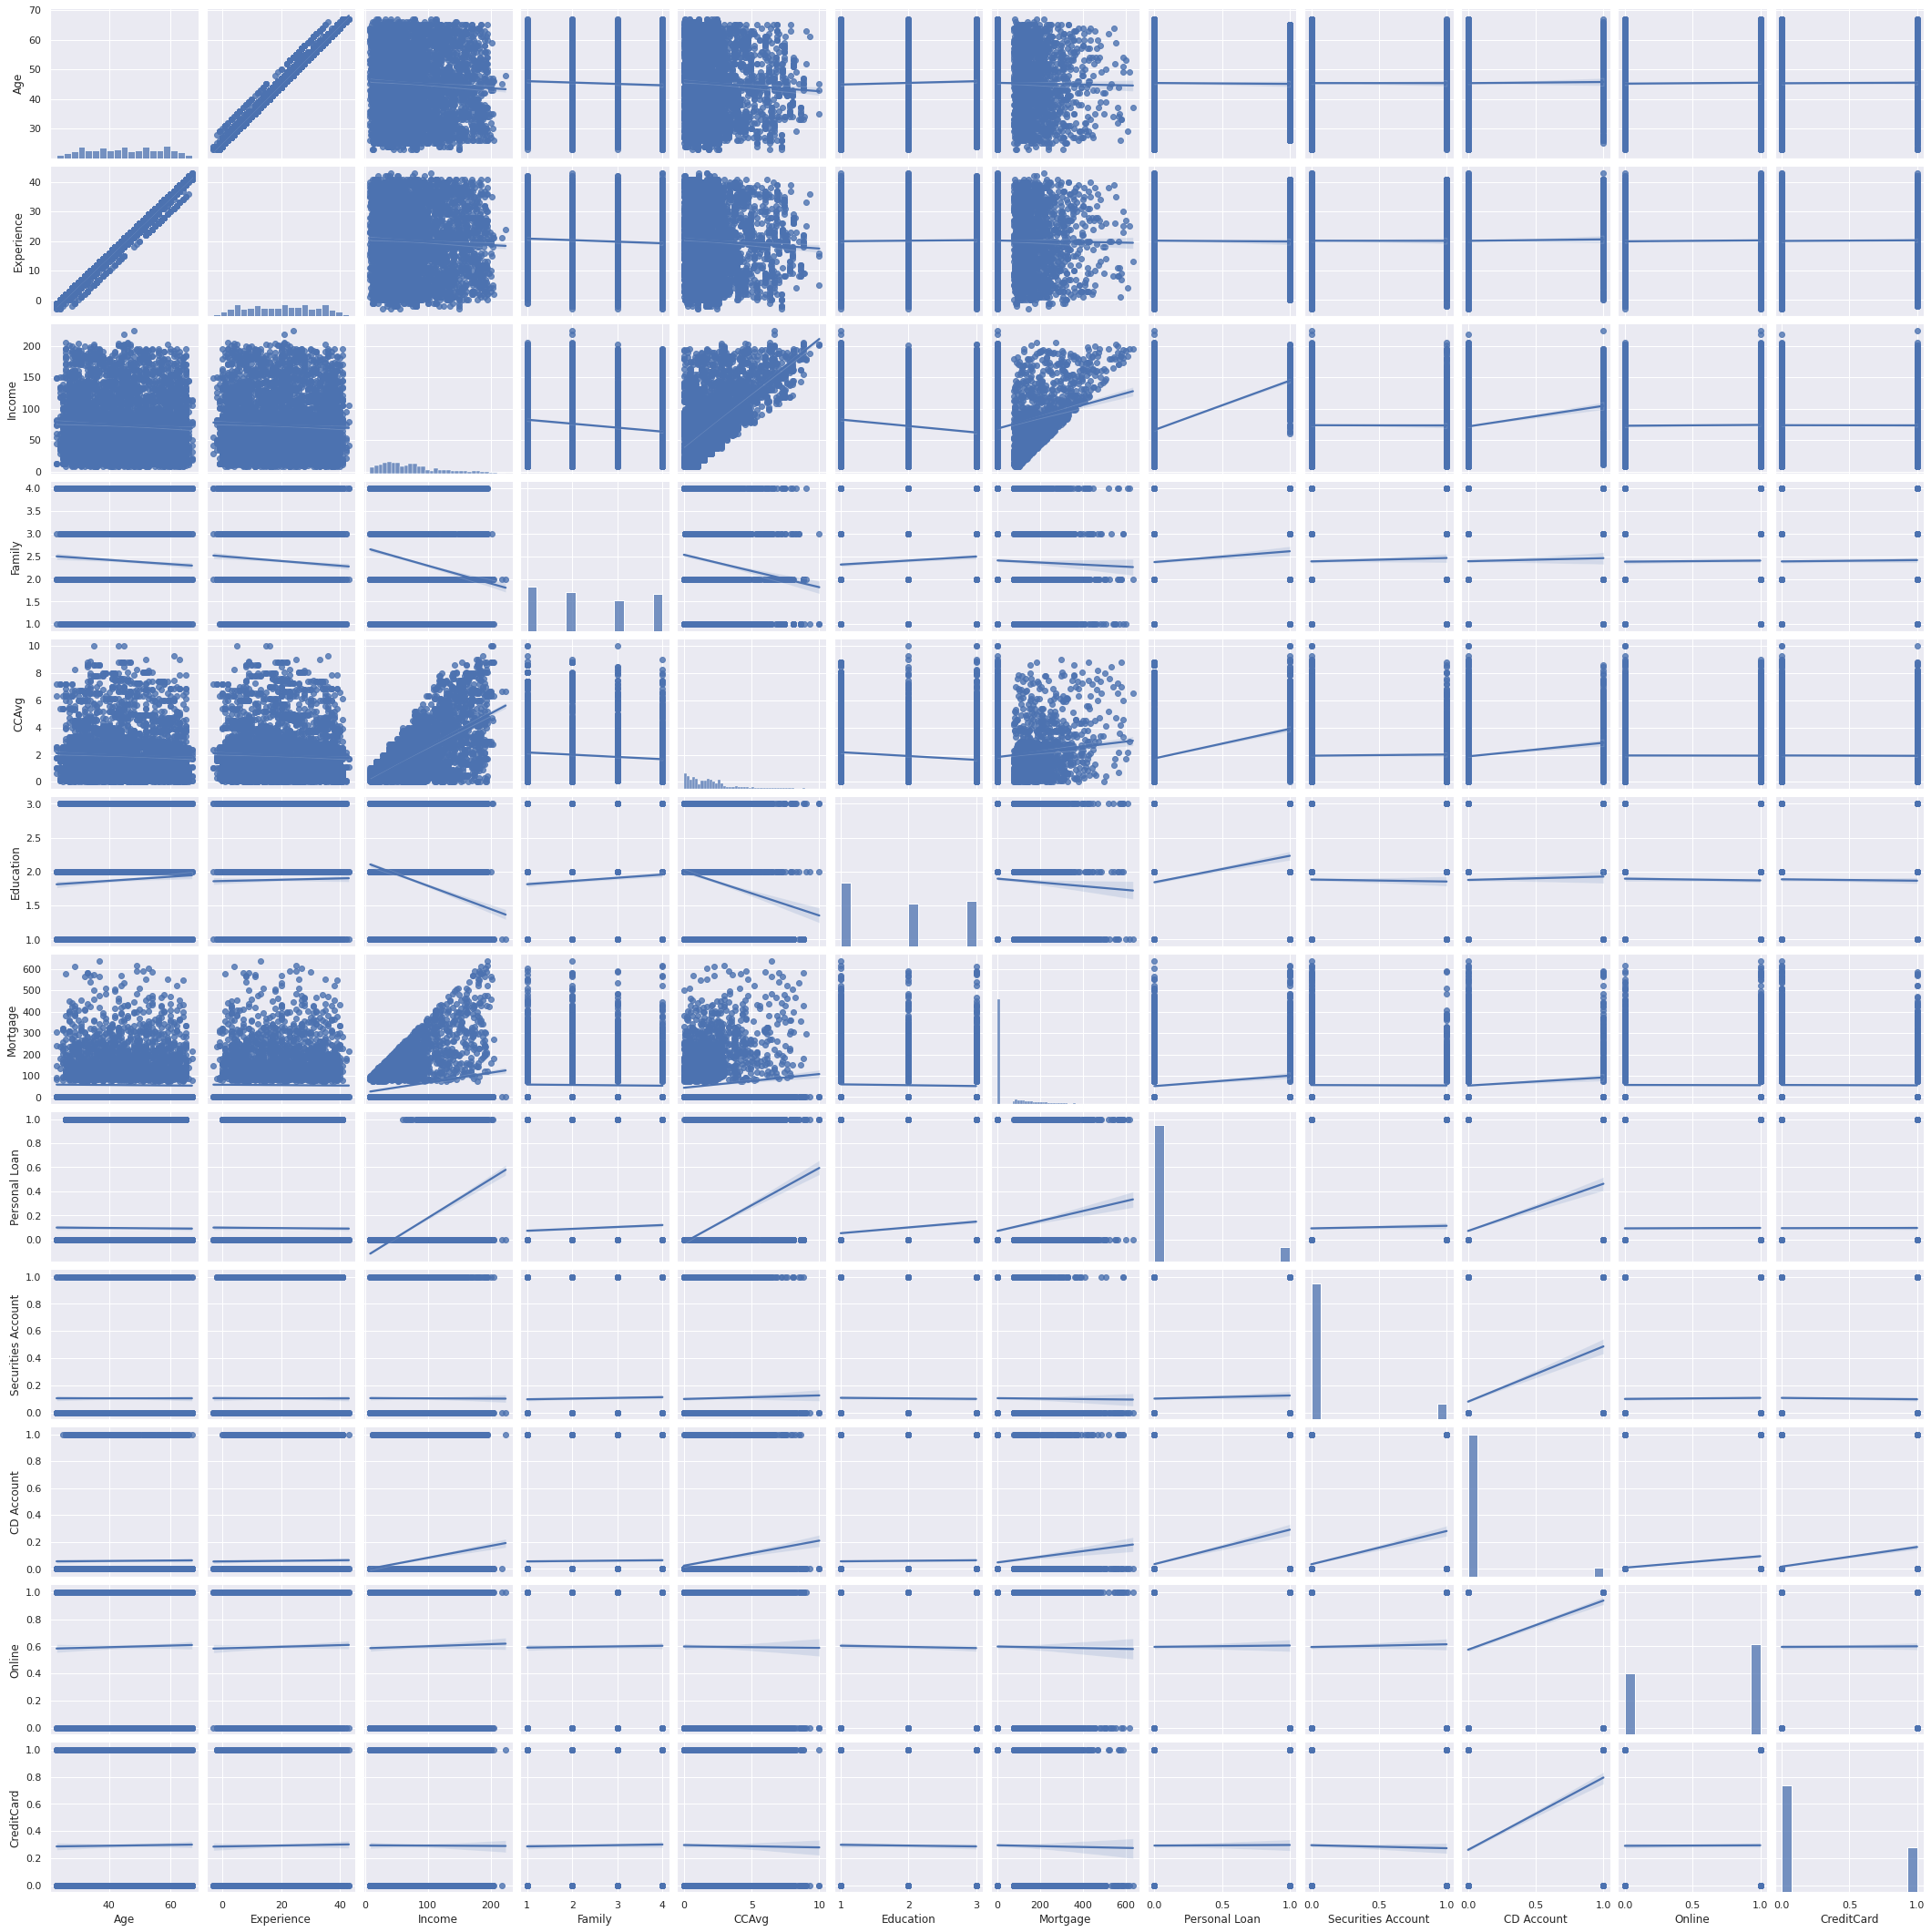

In [25]:
sns.pairplot(df, kind="reg")

* **Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
* **Experience** is normally distributed with more customer having experience starting from 8 years. Here the **mean** is equal to **median**. There are negative values in the **Experience**. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* **Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the **mean** is greater than the **median**
* **CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* **Mortgage**  70% of the individuals have a mortgage of less than 40K. However the max value is 635K

================================== Kaggle

1. Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
2. "Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
3. We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
4. For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
5. For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
6. For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
7. Distributin of "Family" and "Education" are evenly distributed

In [61]:
df[df['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience.We have to clean it.

### Heatmap

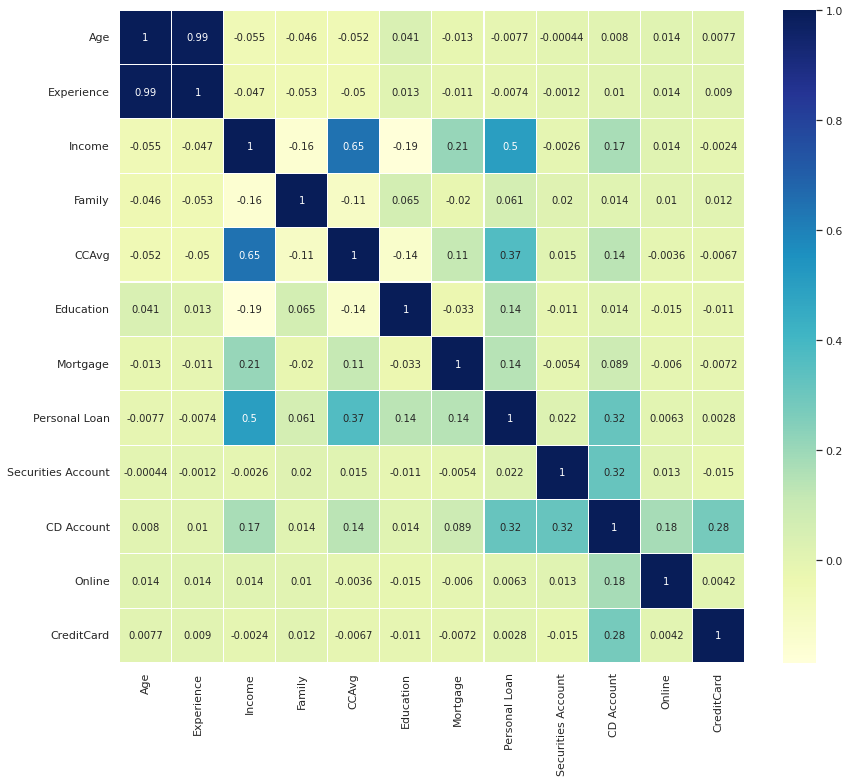

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#### Observation: 
* CCAvg and Income are correlated to each other.
* Income and experience have very high correlation
* Income and Personal Loan has correlation.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  1.9) Univariate Analysis 

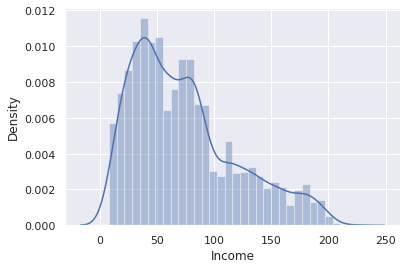

In [27]:
sns.distplot(df['Income']) #Distribution of income

Text(0.7, 59, 'IQR')

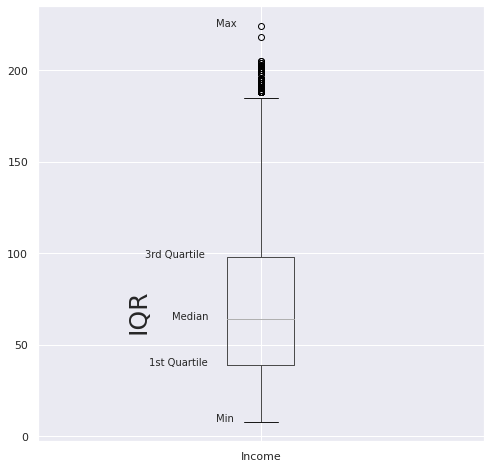

In [28]:
# Create boxplot for column="Income"
df.boxplot(column="Income",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=98.00, s="3rd Quartile")
plt.text(x=0.8, y=64.00, s="Median")
plt.text(x=0.75, y=39.00, s="1st Quartile")
plt.text(x=0.9, y=8.00, s="Min")
plt.text(x=0.9, y=224.00, s="Max")
plt.text(x=0.7, y=98-39, s="IQR", rotation=90, size=25)

#### It can be observed that income has too many outliers. 

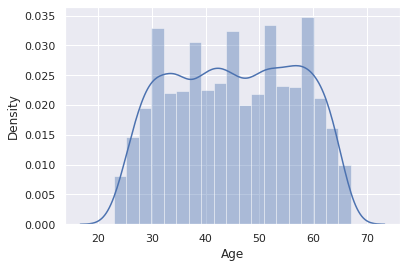

In [29]:
sns.distplot(df['Age']) #Distribution of age

#### It can be observed the age lies mostly between 30-60

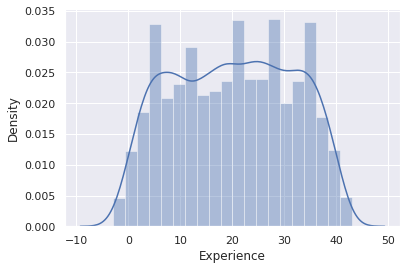

In [30]:
sns.distplot(df['Experience']) #Distribution of experience

#### It can be observed the experience lies mostly between 5-35

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  2) Bivariate Analysis 

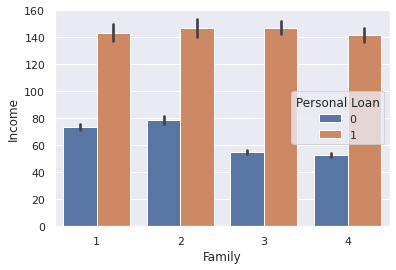

In [31]:
sns.barplot(df['Family'], df['Income'], hue= df['Personal Loan'])

**Observation** - Family Size does not have any impact on loan decision making.

In [32]:
df.columns


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

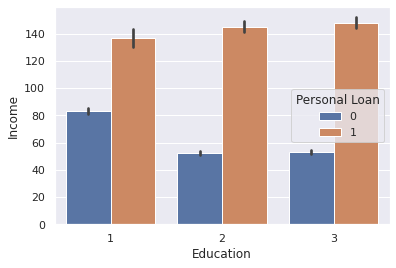

In [33]:
sns.barplot(df['Education'], df['Income'], hue= df['Personal Loan'])

**Observation** - Education does not have any impact on loan decision making.

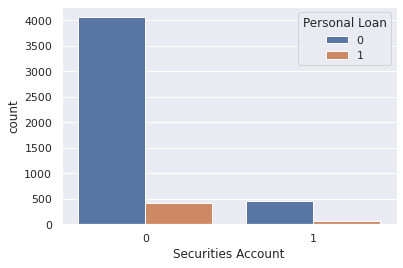

In [34]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

**Observation** - Exisitng Securities Account in a bank does not have any impact on loan decision making.

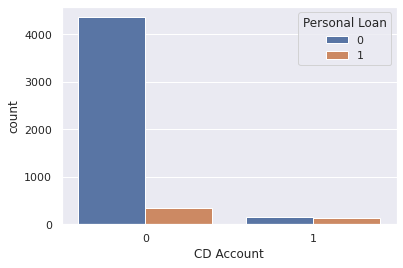

In [35]:
sns.countplot(x="CD Account", data=df,hue="Personal Loan")

**Observation** - Exisitng CDAccount in a bank does not have any impact on loan decision making.

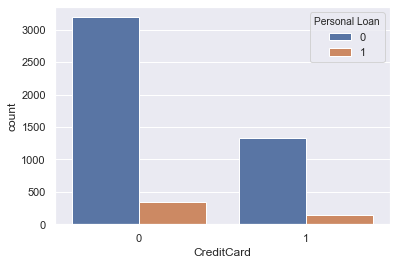

In [ ]:
sns.countplot(x="CreditCard", data=df,hue="Personal Loan")

**Observation** - Exisitng Credit card in a bank does not have any impact on loan decision making.

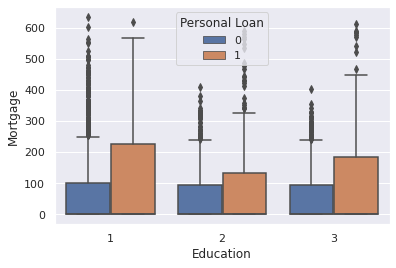

In [36]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

In [37]:
df_with_Peronal_Loan = df.loc[df['Personal Loan'] == 1]
df_without_Peronal_Loan = df.loc[df['Personal Loan'] == 0]

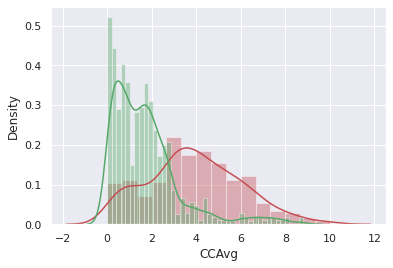

In [38]:
sns.distplot( df_with_Peronal_Loan['CCAvg'], color = 'r')
sns.distplot( df_without_Peronal_Loan['CCAvg'], color = 'g')

**Observation** - Higher **CCAvg** increases tendency to take personal loans.

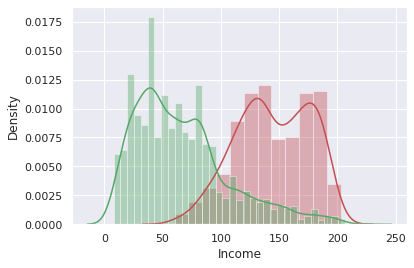

In [39]:
sns.distplot( df_with_Peronal_Loan['Income'], color = 'r')
sns.distplot( df_without_Peronal_Loan['Income'], color = 'g')

**Observation** - Higher **income** increases tendency to take personal loans.

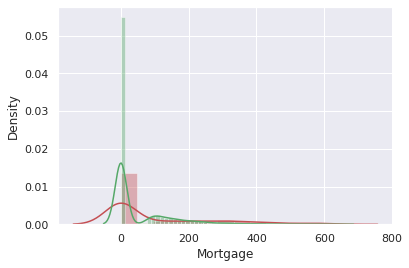

In [40]:
sns.distplot( df_with_Peronal_Loan['Mortgage'], color = 'r')
sns.distplot( df_without_Peronal_Loan['Mortgage'], color = 'g')

**Observation** -  **Mortgage** does not have any impact on personal loans.

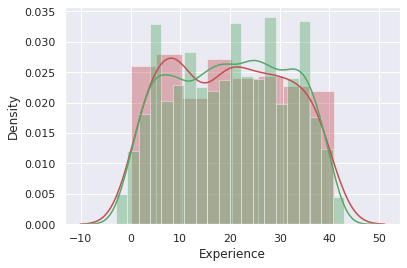

In [41]:
sns.distplot( df_with_Peronal_Loan['Experience'], color = 'r')
sns.distplot( df_without_Peronal_Loan['Experience'], color = 'g')

**Observation** -  **Experience** does not have any impact on personal loans.

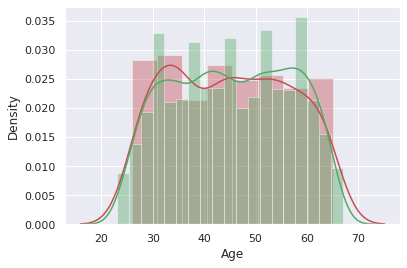

In [42]:
sns.distplot( df_with_Peronal_Loan['Age'], color = 'r')
sns.distplot( df_without_Peronal_Loan['Age'], color = 'g')

**Observation** -  **Age** does not have any impact on personal loans.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  3) Classification 

### Load Data

In [43]:
data_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [44]:
data_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Splittin Data to Train And Test

In [45]:
from sklearn.model_selection import train_test_split
X = data_df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1)
Y = data_df[['Personal Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [46]:
X_train.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.378000,74.042571,93141.693143,2.398857,1.873714,55.949429,0.093714,0.109714,0.060857,0.595143,0.294571
std,11.507182,46.009780,2260.675144,1.149474,0.842597,100.473364,0.291472,0.312578,0.239102,0.490935,0.455915
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91908.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94610.250000,3.000000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_test.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.246000,73.148000,93177.726000,2.390667,1.898000,57.780667,0.101333,0.092000,0.059333,0.600667,0.292667
std,11.363079,46.098838,1756.194882,1.143788,0.833502,104.573778,0.301870,0.289122,0.236326,0.489925,0.455138
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92008.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,93611.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94591.000000,3.000000,3.000000,102.250000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Logistic Regression - Evaluate Performance

In [49]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9546666666666667


In [50]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = logisticRegr.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1337,57
Yes,11,95


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Logistic Regression - Measure Performance

In [51]:
df_table = confusion_matrix(y_test,pred_test)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.95
precision:  0.9
recall   :  0.62
F1 score :  0.74


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> KNN Classifier

In [52]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.894


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> KNN Classifier - Evaluate results

In [53]:
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print(score)

0.894


In [54]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1310,121
Yes,38,31


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> KNN Classifier - Measure results

In [55]:
df_table = confusion_matrix(y_test,pred_test)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.89
precision:  0.45
recall   :  0.2
F1 score :  0.28


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Naive Baiyes Classifier 

In [56]:
from sklearn.naive_bayes import MultinomialNB
nbaiyes = MultinomialNB().fit(X_train, y_train)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Naive Baiyes Classifier- Evaluate Results 

In [57]:
# Use score method to get accuracy of model
score = nbaiyes.score(X_test, y_test)
print(score)

0.786


In [58]:
#Predict for test set
from sklearn.metrics import classification_report,confusion_matrix
pred_test = nbaiyes.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred_test).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1093,66
Yes,255,86


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Naive Baiyes Classifier- Evaluate Results 

In [59]:
df_table = confusion_matrix(y_test,pred_test)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.79
precision:  0.25
recall   :  0.57
F1 score :  0.35


## Classifier Results:
#### Logistic Classifier is the better than NB and KNN respectively in this case study. Part of evaluation and measurement of classifier performances, we have evaluated confusion metrics and **F1** score respectively. F1 score for LR is the highest, hence making it the better approach amongst the three classifiers.